# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Hyperparameter Tuning With Bayesian Optimization



# Import modules
<hr style="border:2px solid black"> </hr>

In [2]:
from numpy import mean
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# Create a synthetic dataset
<hr style="border:2px solid black"> </hr>

In [3]:
"""
We will use a simple test classification problem via the make_blobs() function with 500 examples, each with 
two features and three class labels.
"""

'\nWe will use a simple test classification problem via the make_blobs() function with 500 examples, each with \ntwo features and three class labels.\n'

In [4]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2)

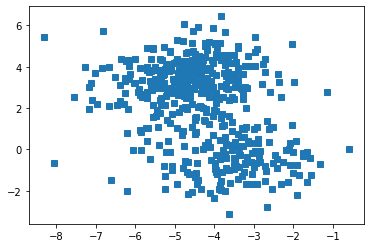

In [5]:
pyplot.plot(X[:,0], X[:,1], "s")

# Create the model
<hr style="border:2px solid black"> </hr>

In [6]:
# define the model
model = KNeighborsClassifier()

# Hyperparameterisation
<hr style="border:2px solid black"> </hr>

In [7]:
"""
In this case, we will tune the number of neighbors (n_neighbors) and the shape of the neighborhood function (p).
This requires ranges be defined for a given data type. In this case, they are Integers, defined with the min, max,
and the name of the parameter to the scikit-learn model.
"""

'\nIn this case, we will tune the number of neighbors (n_neighbors) and the shape of the neighborhood function (p).\nThis requires ranges be defined for a given data type. In this case, they are Integers, defined with the min, max,\nand the name of the parameter to the scikit-learn model.\n'

In [8]:
# define the space of hyperparameters to search
search_space = [Integer(1, 5, name='n_neighbors'), Integer(1, 2, name='p')]

In [9]:
"""
syntax **kwargs -> is used to pass a keyworded, variable-length argument list. 

https://scikit-optimize.github.io/stable/modules/generated/skopt.utils.use_named_args.html
skopt.utils.use_named_args is a wrapper / decorator for an objective function that uses named arguments to make it
compatible with optimizers that use a single list of parameters.
"""

'\nsyntax **kwargs -> is used to pass a keyworded, variable-length argument list. \n\nhttps://scikit-optimize.github.io/stable/modules/generated/skopt.utils.use_named_args.html\nskopt.utils.use_named_args is a wrapper / decorator for an objective function that uses named arguments to make it\ncompatible with optimizers that use a single list of parameters.\n'

In [10]:
# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    
    #for key, value in params.items():
    #    print(key, value)
    
    # something
    model.set_params(**params)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = mean(result)
    return 1.0 - estimate

In [11]:
# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

Best Accuracy: 0.736
Best Parameters: n_neighbors=3, p=1


# On the use of use_named_args as a decorator
<hr style="border:2px solid black"> </hr>

In [12]:
from skopt.space import Real
from skopt import forest_minimize
from skopt.utils import use_named_args

In [13]:
# Define the search-space dimensions. They must all have names!
dim1 = Real(name='foo', low=0.0, high=1.0)
dim2 = Real(name='bar', low=0.0, high=1.0)
dim3 = Real(name='baz', low=0.0, high=1.0)

In [14]:
dim1

Real(low=0.0, high=1.0, prior='uniform', transform='identity')

In [15]:
# Gather the search-space dimensions in a list.
dimensions = [dim1, dim2, dim3]

In [16]:
dimensions

[Real(low=0.0, high=1.0, prior='uniform', transform='identity'),
 Real(low=0.0, high=1.0, prior='uniform', transform='identity'),
 Real(low=0.0, high=1.0, prior='uniform', transform='identity')]

In [20]:
# Define the objective function with named arguments and use this function-decorator to specify the
# search-space dimensions.
@use_named_args(dimensions=dimensions)
def my_objective_function(foo, bar, baz):
     return foo ** 2 + bar ** 4 + baz ** 8

In [ ]:
"""
Not the function is callable from the outside as `my_objective_function(x)` where `x` is a list of unnamed arguments,
which then wraps your objective function that is callable as `my_objective_function(foo, bar, baz)`.
The conversion from a list `x` to named parameters `foo`, `bar`, `baz` # is done automatically
"""

In [21]:
# Run the optimizer on the wrapped objective function which is called
# as `my_objective_function(x)` as expected by `forest_minimize()`.
result = forest_minimize(func=my_objective_function,
                          dimensions=dimensions,
                          n_calls=20, base_estimator="ET",
                          random_state=4)

In [22]:
# Print the best-found results.
print("Best fitness:", result.fun)
print("Best parameters:", result.x)

Best fitness: 0.1948080835239698
Best parameters: [0.44134853091052617, 0.06570954323368307, 0.17586123323419825]


# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/what-is-bayesian-optimization/

